In [56]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error, classification_report, confusion_matrix

In [57]:
current_dir = os.getcwd()
column_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
path_file = os.path.join(current_dir, "datasets/iris.data")
data = pd.read_csv(path_file, header=None, names=column_names)

In [58]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [60]:
X = data[['sepal_length', 'petal_length']]
y = data['species']

In [61]:
X.head()

,sepal_length,petal_length
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


In [62]:
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: species, dtype: object

In [63]:
y = y.map({'Iris-setosa': -1, 'Iris-versicolor': 1, 'Iris-virginica': 0})

In [64]:
mask = y != 0
X = X[mask]
y = y[mask]

In [65]:
y.head()

0   -1
1   -1
2   -1
3   -1
4   -1
Name: species, dtype: int64

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
percep_clf = Perceptron()
percep_clf.fit(X_train, y_train)

Perceptron()

In [68]:
y_pred = percep_clf.predict(X_test)

In [69]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
26,-1,-1
86,1,1
2,-1,-1
55,1,1
75,1,1


In [70]:
mse = mean_squared_error(y_test, y_pred)
print('Erro quadratico medio (MSE): ', mse)

Erro quadratico medio (MSE):  0.0


In [71]:
mae = mean_absolute_error(y_test, y_pred)
print('Erro absoluto medio (MAE): ', mae)

Erro absoluto medio (MAE):  0.0


In [72]:
accuracy = accuracy_score(y_test, y_pred)
print('Acurácia (SVM):', accuracy)

Acurácia (SVM): 1.0


In [73]:
target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
report = classification_report(y_test, y_pred, target_names=target_names)
print(report)

ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

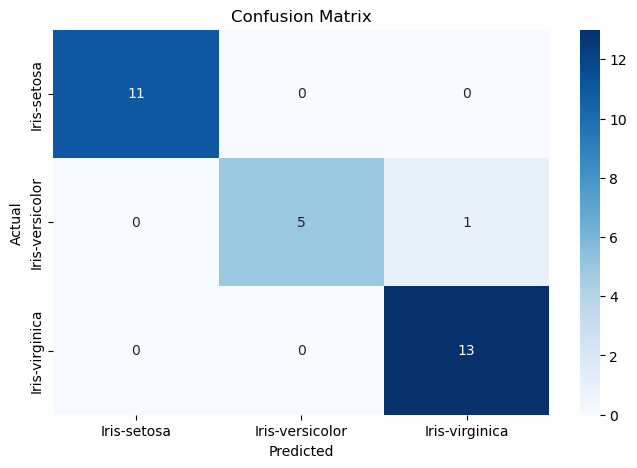

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
class_labels = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()